In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_auc_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

from sklearn.model_selection import GridSearchCV

from mlxtend.classifier import StackingClassifier

from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df=pd.read_csv('titanic.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA by sweetviz library

In [4]:
import sweetviz

In [5]:
my_report=sweetviz.analyze([df,'df'],target_feat='Survived')#target feature must be numerical to apply sweetviz library

:FEATURES DONE:                    |█████████████████████| [100%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [6]:
my_report.show_html('housepricetrain.html')

Report housepricetrain.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# General data checking

In [7]:
df.shape

(891, 12)

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

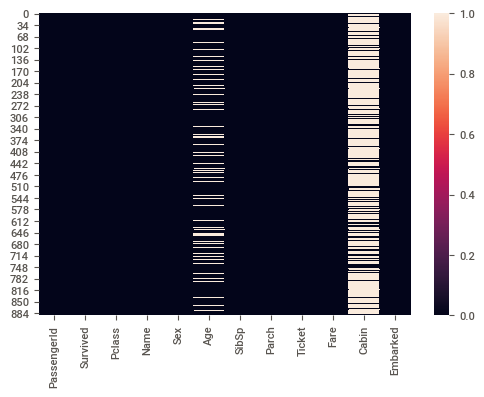

In [14]:
sns.heatmap(df.isnull())  

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Feature Engineering

In [16]:
#Imputing the missing values and dropping columns which are irrelivant for model building

In [17]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked']).mode()[0]

#changing categorical data of Sex column to numerical type
df['Sex']=df['Sex'].replace(['male','female'],[0,1])

In [18]:
#dropping unnecessary columns
df=df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,29.699118,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


In [19]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# EDA

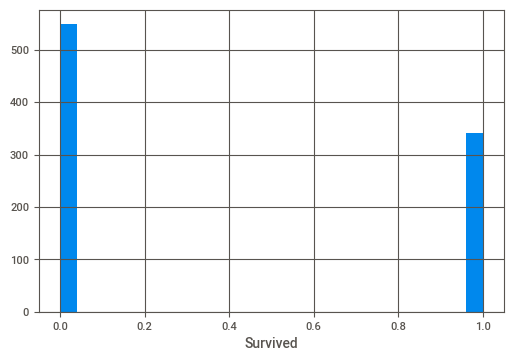

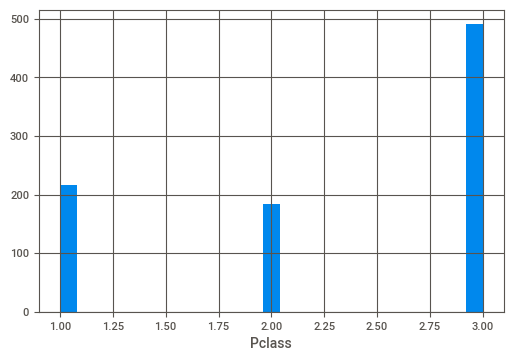

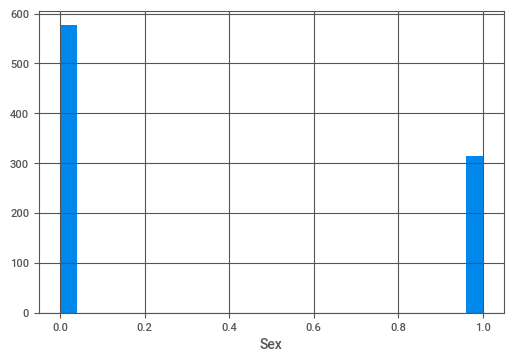

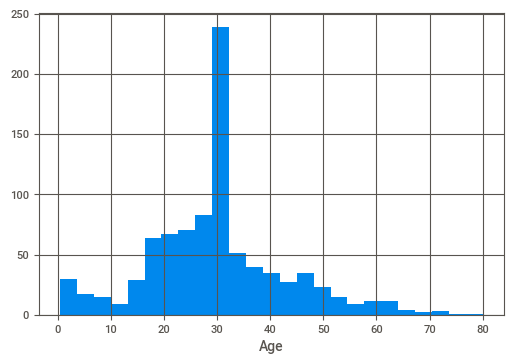

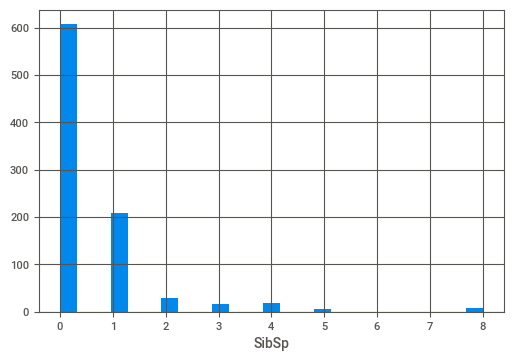

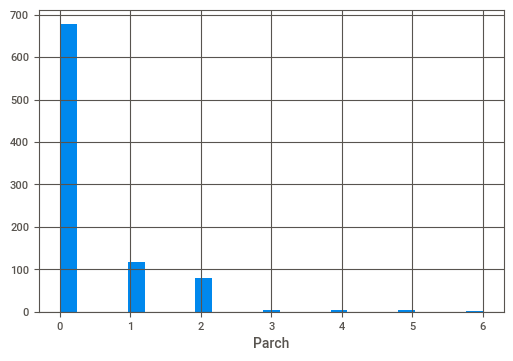

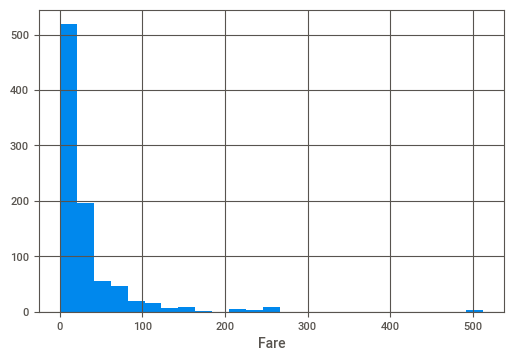

In [20]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

<AxesSubplot:>

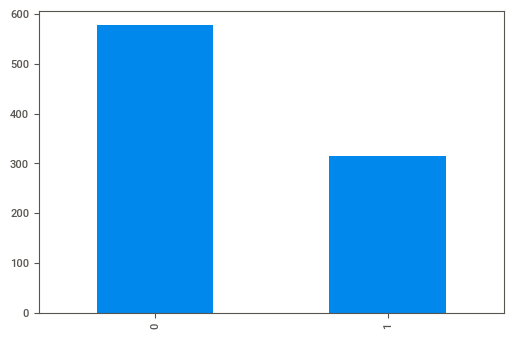

In [21]:
df['Sex'].value_counts().plot.bar()

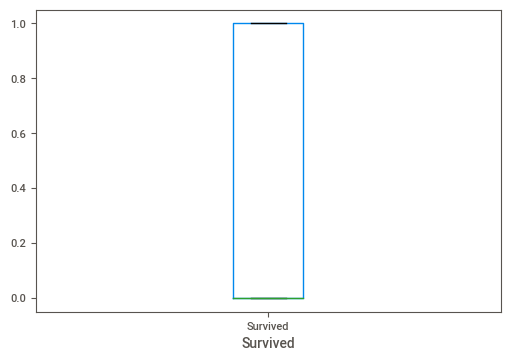

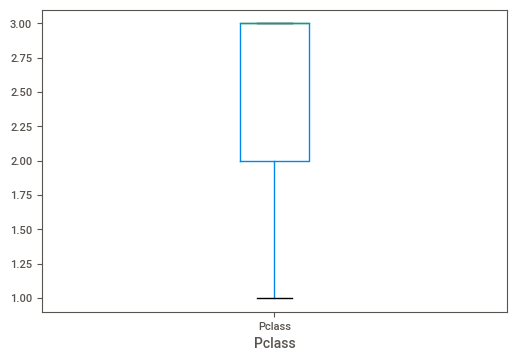

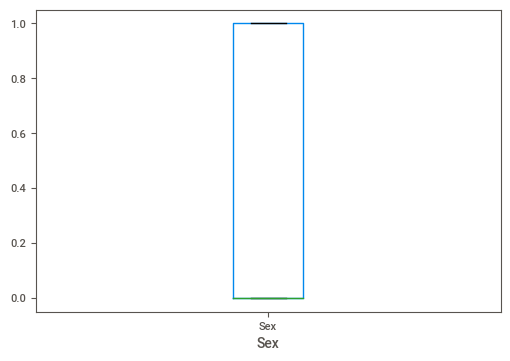

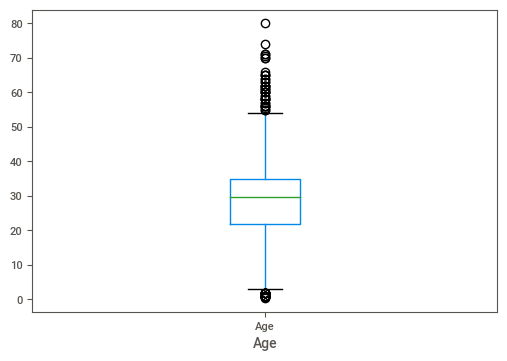

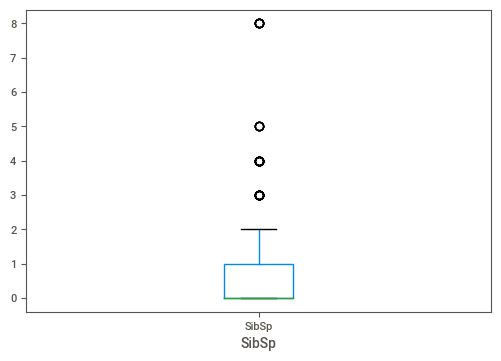

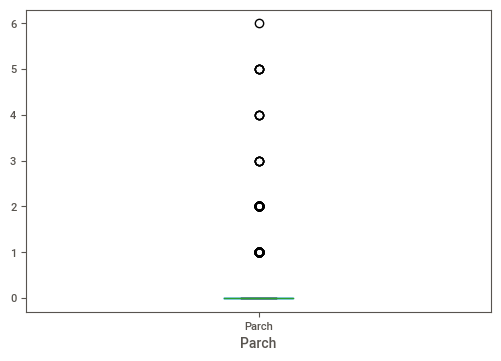

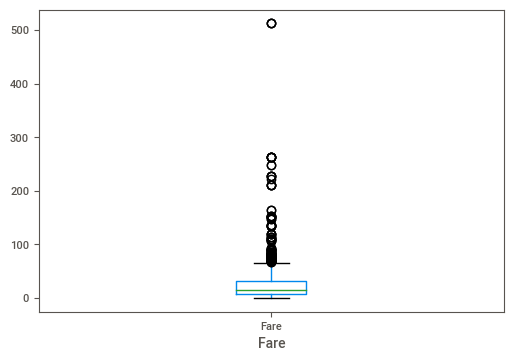

In [22]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

In [23]:
df.groupby('Sex')['Survived'].value_counts().unstack()

Survived,0,1
Sex,,
0,468,109
1,81,233


<AxesSubplot:xlabel='Sex'>

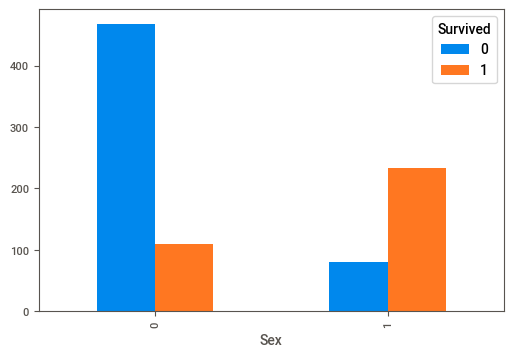

In [24]:
df.groupby('Sex')['Survived'].value_counts().unstack().plot.bar()

In [25]:
#from this graph we can say more % of female passengers have survived compared to male

# Feature Engineering part-2

In [26]:
#data is skewed
#so we will use two step method to remove skewness as much as possible.
#1-->log transformations
#2-->StandarScaler

In [27]:
df.dtypes  
#we need to convert them into integer/float before applying the algorithms

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [28]:
#Removing skewness in the dataset by applying log transformations

df.skew() #we can see the data is +vely(right)skewed,hence we apply log transformation and then scale the data. 

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

# Removing ouliers by z score method

In [29]:
#Removing outliers first
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(891, 7)

In [30]:
df=df[(z<3).all(axis=1)]
df.shape

(820, 7)

# Removing skewness by log transformation technique

In [31]:
#Removing skewness second
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
    

In [32]:
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex         0.664152
Age         0.318314
SibSp       1.292829
Parch       1.832391
Fare        0.196364
dtype: float64

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0.000000,22.0,0.693147,0.0,2.110213
1,1,1,0.693147,38.0,0.693147,0.0,4.280593
2,1,3,0.693147,26.0,0.000000,0.0,2.188856
3,1,1,0.693147,35.0,0.693147,0.0,3.990834
4,0,3,0.000000,35.0,0.000000,0.0,2.202765


# Divideing dataset into independent and dependent feature  

In [34]:
y=df[['Survived']]
X=df.drop(['Survived'],axis=1)

In [35]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

# Feature scaling

In [36]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


# Model Building

In [37]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [39]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [40]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.8048780487804879


cross_val_score  - 0.8109756097560975


roc_auc_score  - 0.7725000000000001


Recall_score  - 0.625


classification report
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       125
           1       0.83      0.62      0.71        80

    accuracy                           0.80       205
   macro avg       0.81      0.77      0.78       205
weighted avg       0.81      0.80      0.80       205



[[115  10]
 [ 30  50]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** SVC *******************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf

AxesSubplot(0.125,0.808774;0.62x0.0712264)





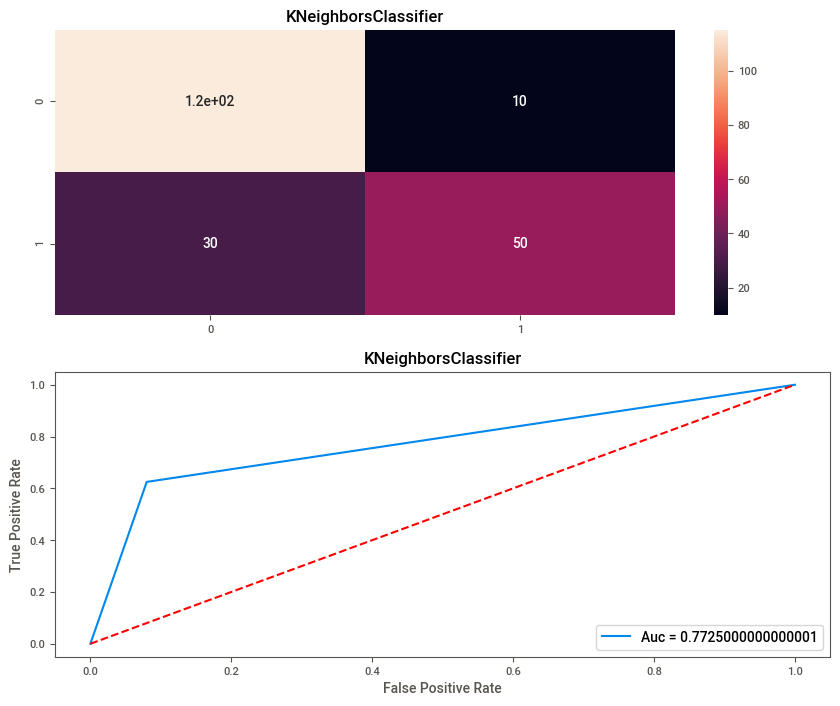

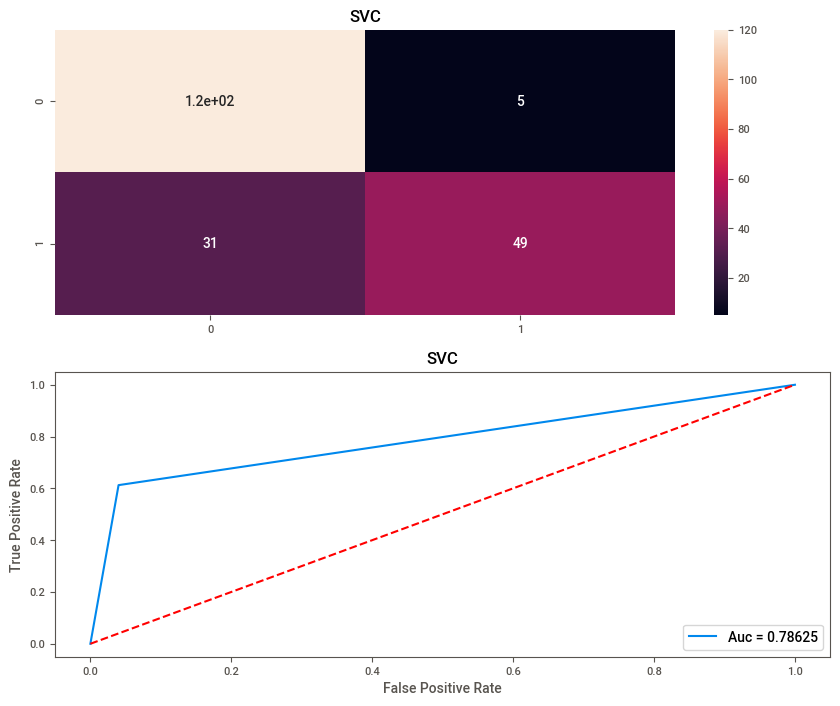

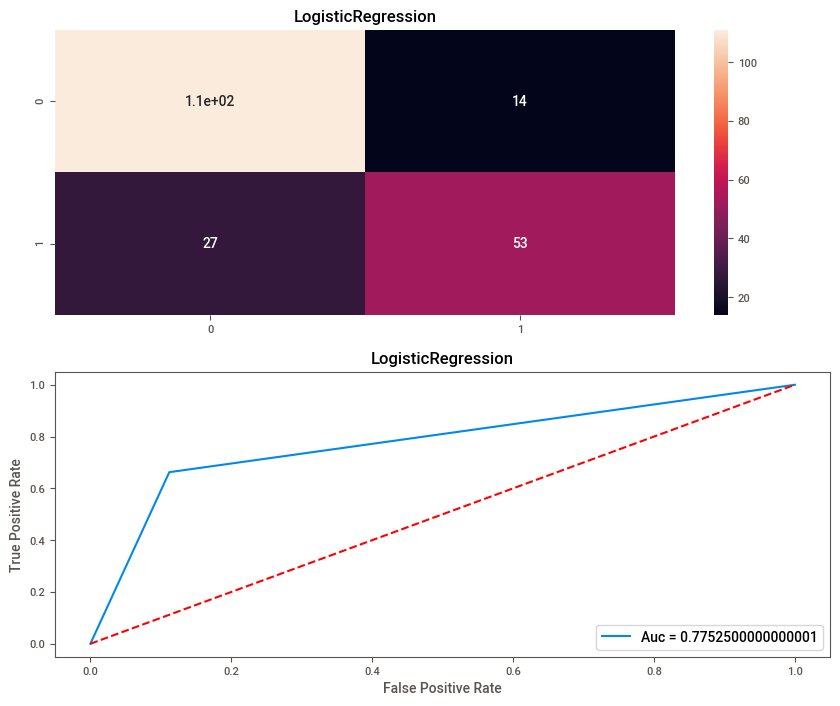

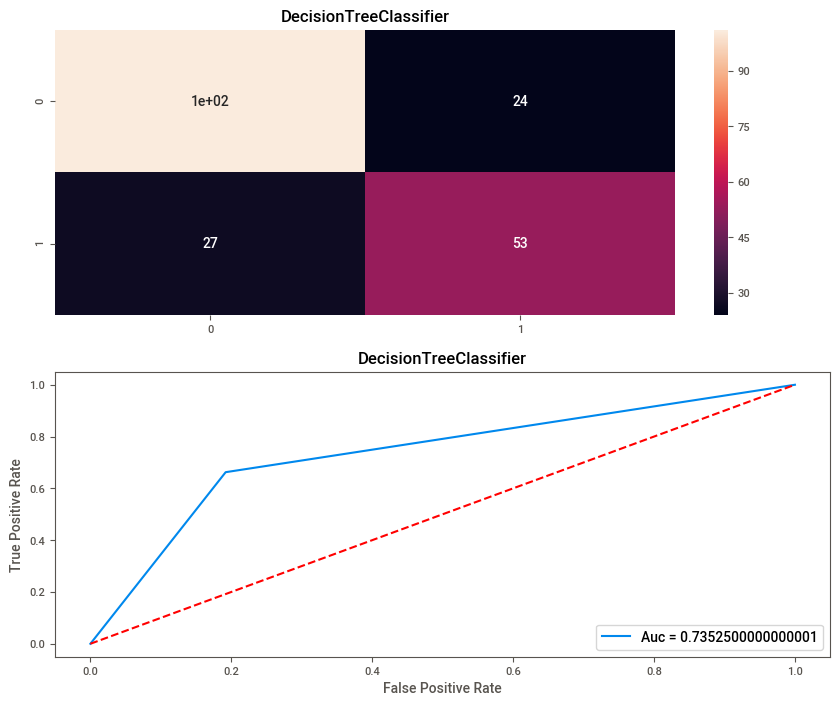

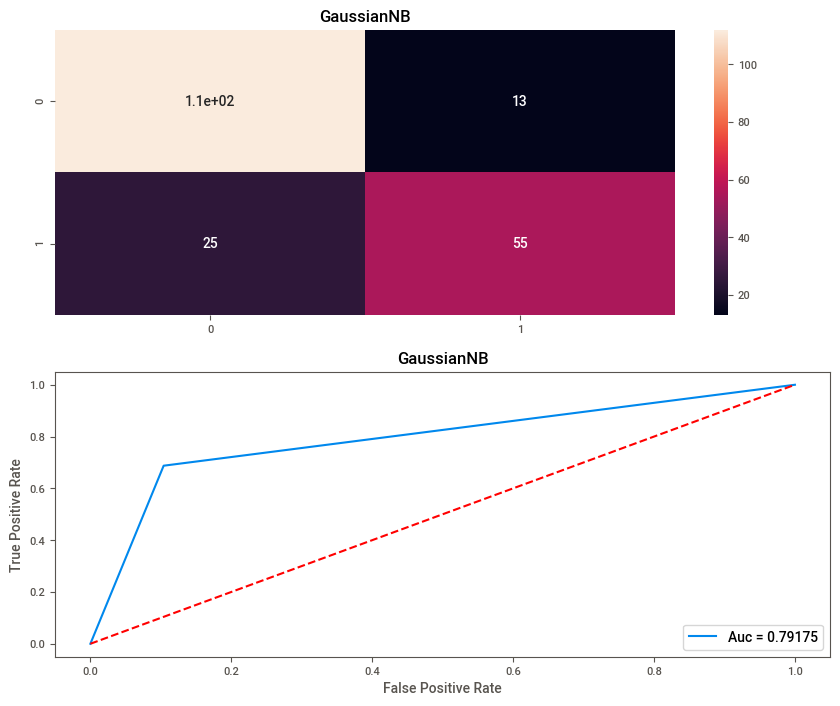

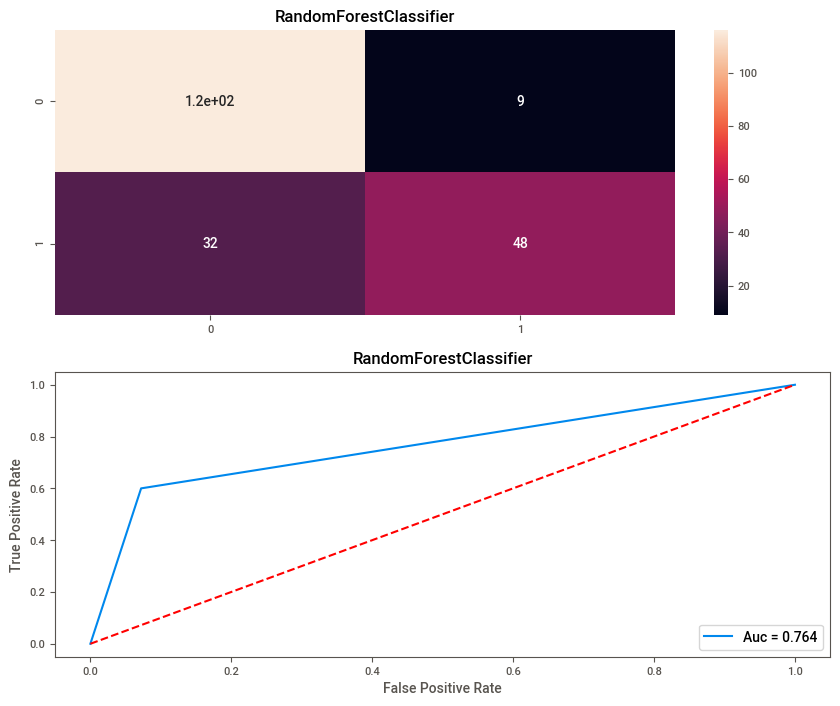

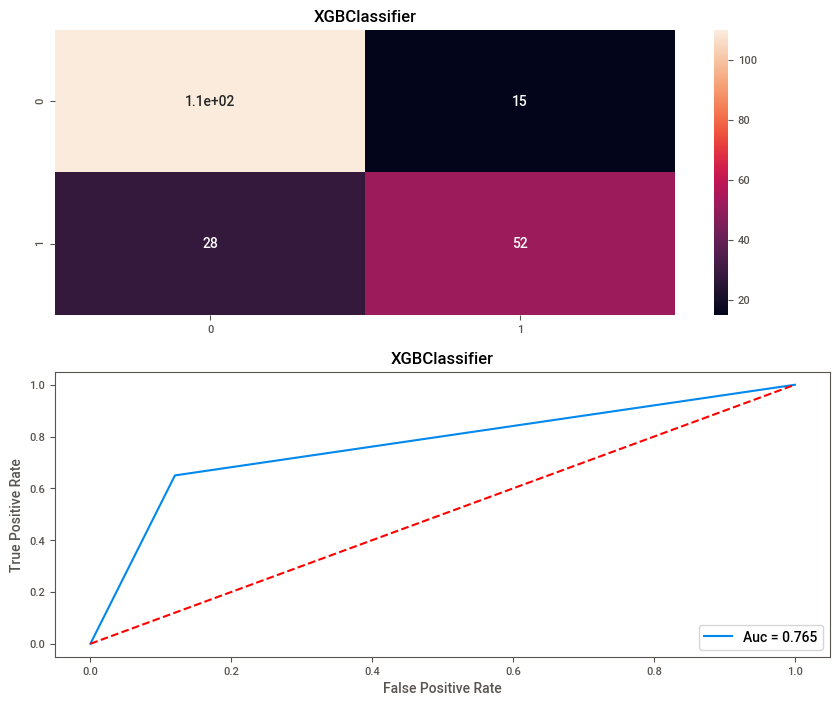

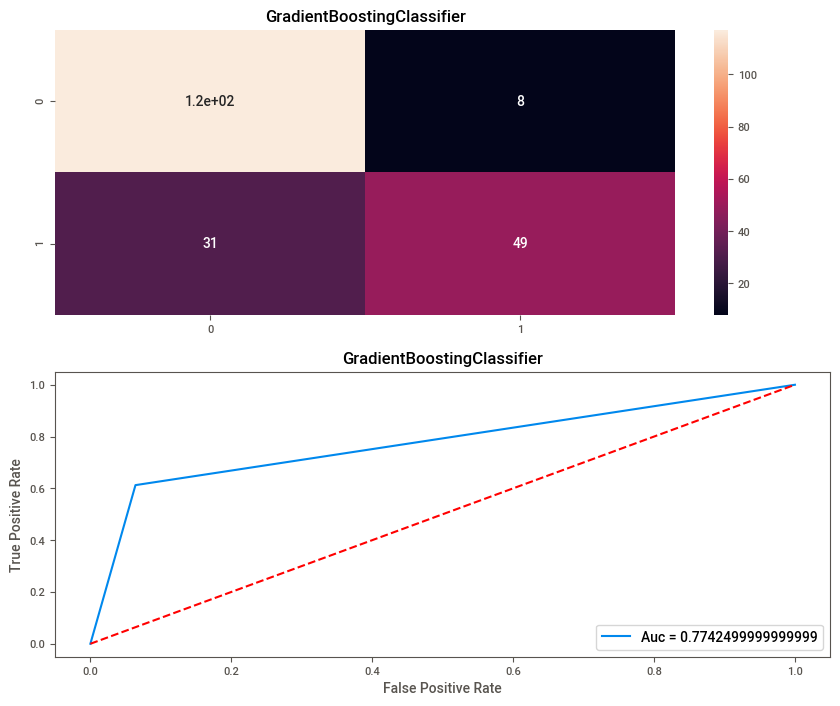

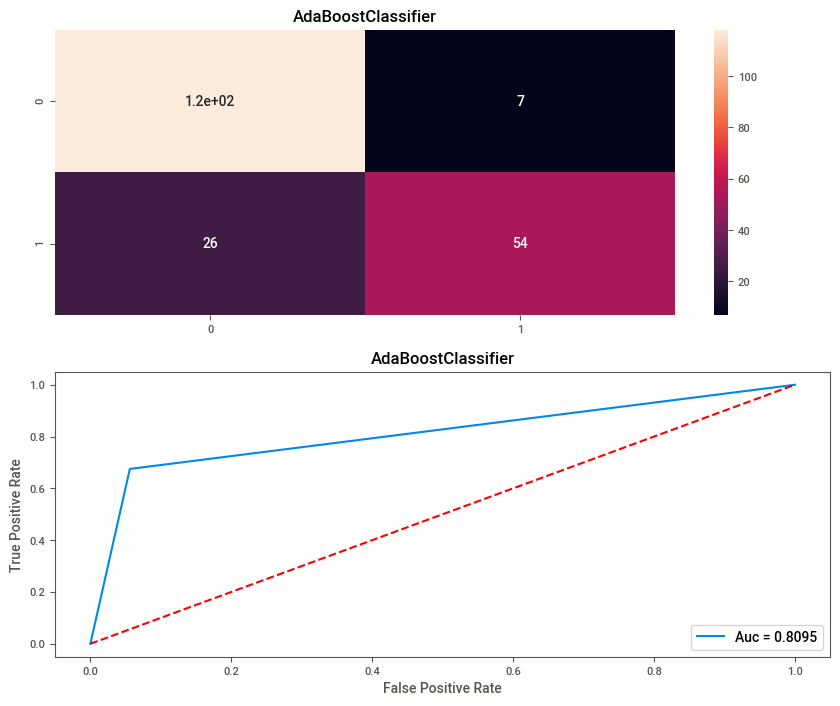

In [42]:
Model=[]
score=[]
cv=[]
rocscore=[]
recall=[]
for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    fpr,tpr,threshold=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score  -',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    re=recall_score(y_test,pre)
    print('Recall_score  -',re)
    recall.append(re*100)
    print('\n')
    
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='Auc = ' +str(roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    
    
    

In [43]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Recall_score':recall,'Cross_val_score':cv,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Recall_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,80.487805,62.50,81.097561,77.250
1,SVC,82.439024,61.25,82.195122,78.625
2,LogisticRegression,80.000000,66.25,78.780488,77.525
3,DecisionTreeClassifier,75.121951,66.25,77.560976,73.525
4,GaussianNB,81.463415,68.75,76.585366,79.175
5,RandomForestClassifier,80.000000,60.00,79.512195,76.400
6,XGBClassifier,79.024390,65.00,80.487805,76.500
7,GradientBoostingClassifier,80.975610,61.25,82.926829,77.425
8,AdaBoostClassifier,83.902439,67.50,80.000000,80.950


In [44]:
#hence AdaBoostClassifier is the best performing Algorithm with accuracy=83.9% for the taken dataset.
#BUt GradientBoostingClassifier has the highest CV score

In [45]:
#Hence we will apply Gridsearchcv to the top3 performing  model and try to increase the cv score.
#model with highest CV score will be choosen as final model.

In [46]:
#Now lets calculate the random state of the models at which they perform the best.

# Finding the best random_state for all models

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        roc_score=roc_auc_score(y_test,pred)
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy,'and roc_auc_score=',roc_score)
    return final_r_state

In [48]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   51   which is   0.8536585365853658 and roc_auc_score= 0.7997500000000001
knn 51
max_accuracy_score is at random_state   56   which is   0.8829268292682927 and roc_auc_score= 0.80375
svc 56
max_accuracy_score is at random_state   56   which is   0.8682926829268293 and roc_auc_score= 0.7655
lr 56
max_accuracy_score is at random_state   50   which is   0.8439024390243902 and roc_auc_score= 0.74825
dt 50
max_accuracy_score is at random_state   42   which is   0.8146341463414634 and roc_auc_score= 0.746
gnb 42
max_accuracy_score is at random_state   50   which is   0.8585365853658536 and roc_auc_score= 0.7949999999999999
rfc 50
max_accuracy_score is at random_state   88   which is   0.8390243902439024 and roc_auc_score= 0.8052499999999999
xgb 88
max_accuracy_score is at random_state   88   which is   0.8634146341463415 and roc_auc_score= 0.8292499999999999
gbc 88
max_accuracy_score is at random_state   51   which is   0.848780487804878 and roc_auc_sco

In [49]:
#We can see SVC is performing the best at random state=56
#But we dint reach our target of 90% accuracy.
#So to reach the target of 90% accuracy we will try the gridsearchcv & stacking technique by taking 3 top performing model. 

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,stratify=y)
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
score=accuracy_score(y_test,pred_svc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.8829268292682927


In [51]:
#selecting our top 3 models to be used for grisearchcv & stacking
#model-1-->svc(accuracy=88.29%) at random_state=56
#model-2-->gbc(accuracy=86.34%) at random_state=88
#model-3-->rfc(accuracy=85.85%) at random_state=50

# GridsearchCV for top3 performing model

# model-1-->svc(accuracy=88.29%) at random_state=56

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,stratify=y)
svc=SVC()

In [53]:
from sklearn.model_selection import GridSearchCV

parameters=[{'kernel':['rbf','linear'],'C':[1,2,3,5,10],'gamma':[0.1,1,10]}]
            
grid_search=GridSearchCV(svc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,stratify=y)
svc=SVC(C=1,gamma=0.1,kernel='rbf')
svc.fit(x,y)
pred_svc=svc.predict(x_test)
score=accuracy_score(y_test,pred_svc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.8878048780487805


In [60]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
svc=SVC(C=1,gamma=0.1,kernel='rbf')
cvs=cross_val_score(svc,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(svc,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8231707317073171


array([[445,  90],
       [ 55, 230]], dtype=int64)

# model-2-->gbc(accuracy=86.34%) at random_state=88

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=88,stratify=y)
gbc=GradientBoostingClassifier()

In [62]:
from sklearn.model_selection import GridSearchCV

parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],
            'learning_rate':[0.1,0.05,0.01,0.001], 'n_estimators':[100,250,500,750,1000]}]
            
grid_search=GridSearchCV(gbc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'n_estimators': 250}

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=88,stratify=y)
gbc=GradientBoostingClassifier(learning_rate=0.01,max_depth=5,min_samples_leaf=1,n_estimators=250)
gbc.fit(x,y)
pred_gbc=gbc.predict(x_test)
score=accuracy_score(y_test,pred_gbc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.9365853658536586


In [65]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
gbc=GradientBoostingClassifier(learning_rate=0.01,max_depth=5,min_samples_leaf=1,n_estimators=250)
cvs=cross_val_score(gbc,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(gbc,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8219512195121951


array([[455,  99],
       [ 45, 221]], dtype=int64)

# model-3-->rfc(accuracy=85.85%) at random_state=50

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,stratify=y)
rfc=RandomForestClassifier()

In [68]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],
            'criterion':['gini','entropy'], 'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'n_estimators': 500}

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,stratify=y)
rfc=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_leaf=2,n_estimators=500)
rfc.fit(x,y)
pred_rfc=rfc.predict(x_test)
score=accuracy_score(y_test,pred_rfc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.8975609756097561


In [71]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
rfc=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_leaf=2,n_estimators=500)
cvs=cross_val_score(rfc,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(rfc,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.828048780487805


array([[446,  87],
       [ 54, 233]], dtype=int64)

# Stacking our top3 performing models

# 1-->Voting method for classification problem(mode)

In [ ]:
from statistics import mode
final_pred=np.array([])
for i in range(0,len(x_test)):
    final_pred=np.append(final_pred,mode([pred_svc[i],pred_gbc[i],pred_rfc[i]]))

In [ ]:
final=accuracy_score(y_test,final_pred)
final

In [ ]:
#After stacking we can see the score has come down even more.
#Hence we will use our best performing model i.e svc after gridsearchcv at random_state=56

# 2-->Stacking by metaclassifier

In [ ]:
from mlxtend.classifier import StackingClassifier

In [ ]:
svc=SVC(C=2,gamma=0.1,kernel='rbf')
gbc=GradientBoostingClassifier(learning_rate=0.05,max_depth=5,min_samples_leaf=2,n_estimators=100)
rfc=RandomForestClassifier(random_state=50)

In [ ]:
sclf=StackingClassifier(classifiers=[xgb,rfc,gbc],use_probas=True,meta_classifier=lr)#lr=LogisticRegression()

In [ ]:
for clf,label in zip([xgb,rfc,gbc,sclf],['SVC','RandomForestClassifier','GradientBoostingClassifier','StackingClassifier']):
    scores=cross_val_score(clf,x,y,cv=10,scoring='accuracy')
    print('CVscore=',scores.mean(),label)

In [ ]:
for clf,label in zip([svc,rfc,gbc,sclf],['SVC','RandomForestClassifier','GradientBoostingClassifier','StackingClassifier']):
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    scores=accuracy_score(y_test,pred)
    print('Accuracyscore=',scores,label)

In [ ]:
#After stacking by metaclassifier LogisticRegression we can see the score has come down even more.
#Hence we will use our best performing model i.e svc after gridsearchcv at random_state=56

# saving the final model

In [72]:
#From all the model tried above RandomForestClassifier model cross_val_score is best=82.8%,
#corresponding random_state=50
#Hence saving the final model as RandomForestClassifier.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,stratify=y)
rfc=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_leaf=2,n_estimators=500)
rfc.fit(x,y)
pred_rfc=rfc.predict(x_test)
score=accuracy_score(y_test,pred_rfc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.8975609756097561


In [73]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
rfc=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_leaf=2,n_estimators=500)
rfc.fit(x,y)
cvs=cross_val_score(rfc,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(rfc,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.8243902439024391


array([[445,  87],
       [ 55, 233]], dtype=int64)

In [74]:
from sklearn.externals import joblib
joblib.dump(rfc,'project2.obj')

['project2.obj']

In [75]:
model1_rfc=joblib.load('project2.obj')

In [77]:
pred_rfc=model1_rfc.predict(x_test)
pred_rfc

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1], dtype=int64)

# Saving final predictions in file.csv

In [78]:
Final_predictions=pd.DataFrame(pred_rfc,columns=['survived(1) or (0)'])
Final_predictions.to_csv('E:\\final_predictionstitanic.csv',index=False)

# Conclusion:-